In [39]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# New York City Lead in School Drinking Water

# Tell your kids to only drink from Water Bottle Fillers!

I wanted to download the data and just explore it further.  Where does lead occur?  How frequent does it occur?  What types of taps?  How does it compare to other NYC water? 

### Read in the data from the nyc doe website.

In [2]:
url="http://schools.nyc.gov/NR/rdonlyres/2C533835-EA3D-4EE0-9759-33A928A80655/0/2017NYCDOEWaterTestsForLeadResults.xlsx"
#'2017NYCDOEWaterTestsForLeadResults.xlsx'
dflead1=pd.read_excel(url,sheetname='Results By Fixture',skiprows=1)

### get the column names

In [3]:
dflead1.columns

Index([u'Borough', u'District', u'Building ID', u'Building Name', u'Address',
       u'Floor', u'Space Description', u'Closest Room', u'Fixture Type',
       u'Elevated Result', u'Results', u'Catalog ID', u'Sample Date',
       u'Samples Collected', u'Number Of Elevated Samples'],
      dtype='object')

### Check and make sure we count and fraction the same number of elevated samples

In [4]:
print "Number of samples"
print dflead1['Number Of Elevated Samples'].value_counts()
print "\n\nFraction of elevated samples"
print dflead1['Number Of Elevated Samples'].value_counts()/dflead1['Number Of Elevated Samples'].count()

Number of samples
0    121643
1     10633
Name: Number Of Elevated Samples, dtype: int64


Fraction of elevated samples
0    0.919615
1    0.080385
Name: Number Of Elevated Samples, dtype: float64


### Now we look at buildings to see the range of the number of samples at each building.  We only get 1541 which is 3 less than them. But the notes in excel say they lumped three buildings

### Number of samples by building

In [5]:
dflead1['Building Name'].value_counts()

WILLIAM E. GRADY VOC HS - K            359
EDWARD R. MURROW HS - K                351
METROPOLITAN AVENUE CAMPUS - QUEEN     344
AVIATION HS - Q                        290
MIDTOWN EAST CAMPUS - MANHATTAN        289
MOTT HAVEN EDUCATIONAL CAMPUS - BR     281
HARRY S. TRUMAN HS - X                 276
JEROME PARKER CAMPUS - S.I.            274
P.S. 43 - QUEENS                       269
FIORELLO LAGUARDIA HS - MANHATTAN      267
PARK WEST HS (ECF) - MANHATTAN         266
FASHION INDUSTRIES VOC HS - M          266
WASHINGTON IRVING HS - MANHATTAN       253
CANARSIE HS - K                        248
BEACON HIGH SCHOOL - MANHATTAN         244
PROSPECT HEIGHTS HS - K                242
GEORGE W. WINGATE HS - K               240
STUYVESANT HS (NEW) - MANHATTAN        230
BROOKLYN TECH HS - K                   228
P.S. 7 - QUEENS                        222
ELMHURST EDUCATIONAL CAMPUS - Q        220
P.S. 92 - QUEENS                       219
TOTTENVILLE HS - S. I.                 219
P.S. 30 - M

### Now we can use groupby to look at the number of samples by building to see the worst offenders.

### Buildings sorted by fraction of positive samples

In [6]:
dfBldg=dflead1.groupby('Building Name').sum()
dfBldg.drop('District',axis=1,inplace=True)
dfBldg['Fraction']=dfBldg['Number Of Elevated Samples']/dfBldg['Samples Collected']
dfBldg.sort_values(by=['Fraction'],inplace=True,ascending=False)
dfBldg.head(100)

,Samples Collected,Number Of Elevated Samples,Fraction
Building Name,,,
JAMAICA AF - QUEENS,7,7,1.000000
SHEEPSHEAD BAY AF - BROOKLYN,1,1,1.000000
BOYS & GIRLS AF - BROOKLYN,2,2,1.000000
P.S. 163 TRANSPORTABLE - Q,2,2,1.000000
STEVENSON AF - BRONX,2,2,1.000000
P.S. 193 TRANSPORTABLE - Q,2,2,1.000000
P.S. 112 TRANSPORTABLE - K,2,2,1.000000
NEW UTRECHT AF - BROOKLYN,4,3,0.750000
CHILDS AF - BRONX,10,7,0.700000


# NYC School Lead data by Faucet type.

I read in the data.  Then I grouped by faucet type and and combined duplicate names.
HOSE BIB with Hose Bib

STEAMER with Steamer

bubbler and BUBBLER with Bubbler

SLOP SINK with Slop Sink

COLD WATER FAUCTET and cold water faucet with Cold Water Faucet

WATER BOTTLE FILLER and BOTTLE FILLER with Water Bottle Filler

## Then I looked at the fraction positive for each type

In [7]:
dflead1.replace({'HOSE BIB':'Hose Bib'},inplace=True)
dflead1.replace({'STEAMER':'Steamer'},inplace=True)
dflead1.replace({'BUBBLER':'Bubbler'},inplace=True)
dflead1.replace({'bubbler':'Bubbler'},inplace=True)
dflead1.replace({'SLOP SINK':'Slop Sink'},inplace=True)
dflead1.replace({'COLD WATER FAUCET':'Cold Water Faucet'},inplace=True)
dflead1.replace({'cold water faucet':'Cold Water Faucet'},inplace=True)
dflead1.replace({'WATER BOTTLE FILLER':'Water Bottle Filler'},inplace=True)
dflead1.replace({'BOTTLE FILLER':'Water Bottle Filler'},inplace=True)

dfFix=dflead1.groupby('Fixture Type').sum()
dfFix.drop('District',axis=1,inplace=True)
dfFix['Fraction']=dfFix['Number Of Elevated Samples']/dfFix['Samples Collected']
dfFix.sort_values(by=['Fraction'],inplace=True,ascending=False)
Frac=dfFix.Fraction.values
nVal=dfFix['Samples Collected'].values
dfFix

,Samples Collected,Number Of Elevated Samples,Fraction
Fixture Type,,,
Hose Bib,1138,561,0.492970
Steamer,352,70,0.198864
ICE MAKER,109,14,0.128440
Slop Sink,1137,138,0.121372
Cold Water Faucet,95389,7785,0.081613
Bubbler,33306,2054,0.061671
Water Bottle Filler,845,11,0.013018


## Now we can look at the distribution of positive values

When there is a postive value what is it and which faucet types are the worst offenders?

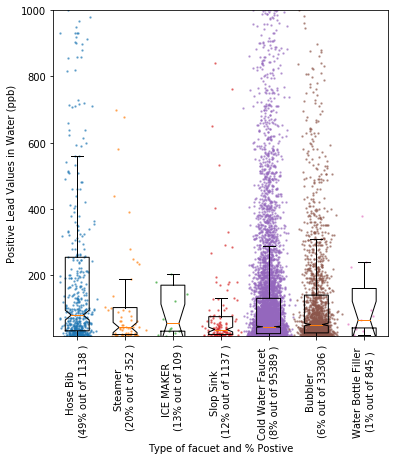

In [40]:
dfPos=dflead1[dflead1.Results!='Below Action Level']
dfPos.Results.replace({'ppb':''},regex=True,inplace=True)
dfPos.loc[:,'Results']=dfPos['Results'].astype(float)
dfPos.loc[:,'Results']=dfPos['Results'].astype(float)


fig,ax=plt.subplots()
fig.set_size_inches(6,6)

pos=np.arange(7)

ax.boxplot([dfPos[dfPos['Fixture Type']=='Hose Bib']['Results'],
              dfPos[dfPos['Fixture Type']=='Steamer']['Results'],
              dfPos[dfPos['Fixture Type']=='ICE MAKER']['Results'],
              dfPos[dfPos['Fixture Type']=='Slop Sink']['Results'],
              dfPos[dfPos['Fixture Type']=='Cold Water Faucet']['Results'],
              dfPos[dfPos['Fixture Type']=='Bubbler']['Results'],
              dfPos[dfPos['Fixture Type']=='Water Bottle Filler']['Results']]
                               ,positions=pos
                               ,widths=0.5,notch=1,showfliers=False)

names=['Hose Bib','Steamer','ICE MAKER','Slop Sink','Cold Water Faucet','Bubbler','Water Bottle Filler']

for i,n in enumerate(names):

    x = np.random.normal(i, 0.15, size=len(dfPos[dfPos['Fixture Type']==n]['Results']))
    ax.scatter(x,dfPos[dfPos['Fixture Type']==n]['Results'],alpha=0.5,s=2)

#ax.boxplot([dfPos['Results']],widths=.11,notch=1)
ax.set_ylim([15,1000])
#ax.set_xticklabels(names)
for i,n in enumerate(names):
    names[i]= "{} \n({:.0f}% out of {} )".format(n,Frac[i]*100,nVal[i])
    

ax.set_xticklabels(names,rotation=90)
ax.set_ylabel('Positive Lead Values in Water (ppb)')
ax.set_xlabel('Type of facuet and % Postive')
fig.savefig('positiveLead.jpg',bbox_inches='tight',dpi=300)              
              
#ax.set_yscale('log')

## now the data with out limits on the y-axis

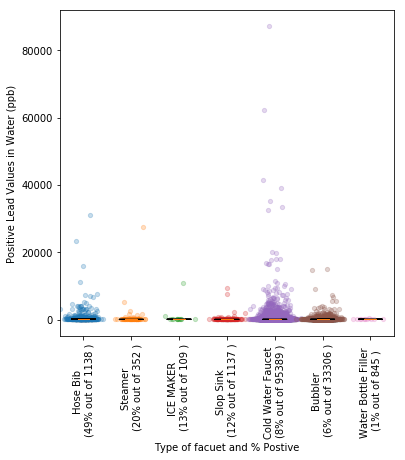

In [45]:
dfPos=dflead1[dflead1.Results!='Below Action Level']
dfPos.Results.replace({'ppb':''},regex=True,inplace=True)
dfPos.loc[:,'Results']=dfPos['Results'].astype(float)
dfPos.loc[:,'Results']=dfPos['Results'].astype(float)


fig,ax=plt.subplots()
fig.set_size_inches(6,6)

pos=np.arange(7)

ax.boxplot([dfPos[dfPos['Fixture Type']=='Hose Bib']['Results'],
              dfPos[dfPos['Fixture Type']=='Steamer']['Results'],
              dfPos[dfPos['Fixture Type']=='ICE MAKER']['Results'],
              dfPos[dfPos['Fixture Type']=='Slop Sink']['Results'],
              dfPos[dfPos['Fixture Type']=='Cold Water Faucet']['Results'],
              dfPos[dfPos['Fixture Type']=='Bubbler']['Results'],
              dfPos[dfPos['Fixture Type']=='Water Bottle Filler']['Results']]
                               ,positions=pos
                               ,widths=0.5,notch=1,showfliers=False)

names=['Hose Bib','Steamer','ICE MAKER','Slop Sink','Cold Water Faucet','Bubbler','Water Bottle Filler']

for i,n in enumerate(names):

    x = np.random.normal(i, 0.15, size=len(dfPos[dfPos['Fixture Type']==n]['Results']))
    ax.scatter(x,dfPos[dfPos['Fixture Type']==n]['Results'],alpha=0.25,s=18)

#ax.boxplot([dfPos['Results']],widths=.11,notch=1)
#ax.set_ylim([15,1000])
#ax.set_xticklabels(names)
for i,n in enumerate(names):
    names[i]= "{} \n({:.0f}% out of {} )".format(n,Frac[i]*100,nVal[i])
    

ax.set_xticklabels(names,rotation=90)
ax.set_ylabel('Positive Lead Values in Water (ppb)')
ax.set_xlabel('Type of facuet and % Postive')
fig.savefig('positiveLeadFullScale.jpg',bbox_inches='tight',dpi=300)              
              
#ax.set_yscale('log')

## Tell your kids to only fill their bottles from the Water Bottle Filler!!!!  

### But if we are telling our kids this lets look at only that data.



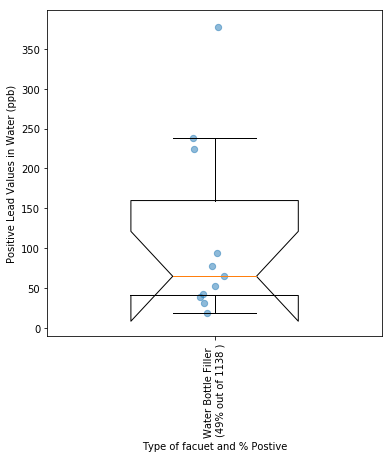

In [34]:
fig,ax=plt.subplots()
fig.set_size_inches(6,6)

pos=np.arange(1)


ax.boxplot([  dfPos[dfPos['Fixture Type']=='Water Bottle Filler']['Results']]
                               ,positions=pos
                               ,widths=0.5,notch=1,showfliers=False)

names=['Water Bottle Filler']

for i,n in enumerate(names):

    x = np.random.normal(i, 0.05, size=len(dfPos[dfPos['Fixture Type']==n]['Results']))
    ax.scatter(x,dfPos[dfPos['Fixture Type']==n]['Results'],alpha=0.5,s=40)

#ax.boxplot([dfPos['Results']],widths=.11,notch=1)
#ax.set_ylim([15,1000])
#ax.set_xticklabels(names)
for i,n in enumerate(names):
    names[i]= "{} \n({:.0f}% out of {} )".format(n,Frac[i]*100,nVal[i])
    

ax.set_xticklabels(names,rotation=90)
ax.set_ylabel('Positive Lead Values in Water (ppb)')
ax.set_xlabel('Type of facuet and % Postive')
fig.savefig('WaterBottleFiller.jpg',bbox_inches='tight') 

## Below is the raw data if you want to see where water bottle fillers are bad.

In [29]:
dfPos[dfPos['Fixture Type']=='Water Bottle Filler']

,Borough,District,Building ID,Building Name,Address,Floor,Space Description,Closest Room,Fixture Type,Elevated Result,Results,Catalog ID,Sample Date,Samples Collected,Number Of Elevated Samples
16962,Manhattan,5,M036,P.S. 36 - MANHATTAN,123 MORNINGSIDE DRIVE,04,Classroom,480,Water Bottle Filler,Yes,77.2,M03604CR000480.1D-109,Jan 5 2017 12:00AM,1,1
27739,Bronx,8,X123,I.S. 123 - BRONX,1025 MORRISON AVENUE,BS,Cafeteria,000B26,Water Bottle Filler,Yes,225.0,X123BSTC000B26.1D-043,Jan 7 2017 12:00AM,1,1
29653,Bronx,8,X962,JANE ADDAMS HS TRANSPORTABLE - X,900 TINTON AVENUE,01,Office,TCU2,Water Bottle Filler,Yes,38.9,X96201OFTCUCU2.1D-010,Jan 7 2017 12:00AM,1,1
39848,Bronx,10,X864,P.S. 205B (ECF) - BRONX,2375 SOUTHERN BLVD,01,Cafeteria,124,Water Bottle Filler,Yes,42.3,X86401TC000124.1D-043,Feb 16 2017 12:00AM,1,1
56801,Brooklyn,15,K169,P.S. 169 - BROOKLYN,4305 7 AVENUE,01,Cafeteria,146 - LARGE C,Water Bottle Filler,Yes,18.0,K16901CF146-LA.1D-136,Apr 5 2017 12:00AM,1,1
61515,Brooklyn,17,K061,I.S. 61 - BROOKLYN,400 EMPIRE BOULEVARD,BS,Classroom,B3,Water Bottle Filler,Yes,378.0,K061BSCR0000B3.1D-024,Dec 16 2016 12:00AM,1,1
82928,Brooklyn,22,K251,P.S. 251 - BROOKLYN,1037 EAST 54 STREET,01,Storage space,126,Water Bottle Filler,Yes,64.7,K25101SO000126.1D-056,Dec 24 2016 12:00AM,1,1
83458,Brooklyn,22,K278,I.S. 278 - BROOKLYN,1925 STUART STREET,BS,Cafeteria,-,Water Bottle Filler,Yes,52.5,K278BSCF000000.1D-009,Dec 16 2016 12:00AM,1,1
93002,Queens,24,Q610,AVIATION HS - Q,45-30 36 STREET,BS,Cafeteria,B42,Water Bottle Filler,Yes,31.4,Q610BSCF000B42.1D-028,Feb 4 2017 12:00AM,1,1
99268,Queens,26,Q074,I.S. 74 - QUEENS,61-15 OCEANIA STREET,BS,Classroom,B31,Water Bottle Filler,Yes,94.5,Q074BSCR000B31.1D-017,Jan 31 2017 12:00AM,1,1


## Finally we can see which borough is the worst.  
### We know this isn't perfect as not all faucets have the same prevalence of lead.

In [35]:
dfSpace=dflead1.groupby('Borough').sum()
dfSpace.drop('District',axis=1,inplace=True)
dfSpace['Fraction']=dfSpace['Number Of Elevated Samples']/dfSpace['Samples Collected']
dfSpace.sort_values(by=['Fraction'],inplace=True,ascending=False)
dfSpace.head(100)

,Samples Collected,Number Of Elevated Samples,Fraction
Borough,,,
Brooklyn,40817,4151,0.101698
Staten Island,8320,727,0.087380
Queens,35226,2486,0.070573
Bronx,25035,1759,0.070262
Manhattan,22878,1510,0.066002


## We know we only really care about bubblers since water bottle fillers are generally low.  

### so lets look by borough and bubbler.  

In [37]:
dfSpace=dflead1[dflead1['Fixture Type']=='Bubbler'].groupby('Borough').sum()
dfSpace.drop('District',axis=1,inplace=True)
dfSpace['Fraction']=dfSpace['Number Of Elevated Samples']/dfSpace['Samples Collected']
dfSpace.sort_values(by=['Fraction'],inplace=True,ascending=False)
dfSpace.head(100)

,Samples Collected,Number Of Elevated Samples,Fraction
Borough,,,
Brooklyn,9525,688,0.072231
Staten Island,2154,149,0.069174
Bronx,6561,418,0.063710
Queens,9147,519,0.056740
Manhattan,5919,280,0.047305


### Brooklyn has the worst water fountains!